In [1]:
%matplotlib inline
import cmlreaders as cml
import numpy as np
import seaborn as sns
import pandas as pd
import sys
sys.path.append('~/pybeh_pd')
import pybeh_pd as pb
import importlib
importlib.reload(pb)

<module 'pybeh_pd' from '/home1/djhalp/pybeh_pd/pybeh_pd.py'>

In [2]:
cml.get_data_index().experiment.unique()

array(['ltpFR', 'ltpFR2', 'VFFR', 'ltpRepFR', 'NiclsCourierClosedLoop',
       'NiclsCourierReadOnly', 'ltpDelayRepFRReadOnly', 'ltpDBOY1',
       'prelim', 'EFRCourierOpenLoop', 'EFRCourierReadOnly', 'FR1', 'FR2',
       'PAL1', 'YC1', 'PAL2', 'catFR1', 'YC2', 'catFR2', 'PS1', 'PS3',
       'PS2', 'TH1', 'FR3', 'PS2.1', 'PAL3', 'TH3', 'OPS', 'RepFR1',
       'catFR3', 'FR5', 'PS4_catFR', 'THR', 'PS4_FR', 'PAL5', 'THR1',
       'catFR5', 'PS4_catFR5', 'FR6', 'PS5_catFR', 'catFR6', 'TICL_FR',
       'LocationSearch', 'TICL_catFR', 'DBOY1', 'CatFR6', 'RepFR2',
       'ICatFR1', 'IFR1', 'CPS', 'pyFR'], dtype=object)

In [3]:
all_events = []
experiment = 'RepFR1'
ix = cml.get_data_index()
exp_ix = ix.query('experiment == @experiment')
for _, df_sess in exp_ix.iterrows():
    try:
        subject = df_sess['subject']
        session = df_sess['session']
        localization = df_sess['localization']
        montage = df_sess['montage']

        reader = cml.CMLReader(subject=subject, experiment=experiment, session=session,
                                    localization=localization, montage=montage)
        sess_events = reader.load('task_events')
        all_events.append(sess_events)
    except:
        continue

all_RepFR1_events = pd.concat(all_events)

/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/cmlreaders/readers/readers.py:250: UserWarning: Changing events session field from 0 to 1 to match data index.
  warnings.warn(f'Changing events session field from {df["session"].unique()[0]} ' +
/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/cmlreaders/readers/readers.py:250: UserWarning: Changing events session field from 0 to 3 to match data index.
  warnings.warn(f'Changing events session field from {df["session"].unique()[0]} ' +
/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/cmlreaders/readers/readers.py:250: UserWarning: Changing events session field from 1 to 4 to match data index.
  warnings.warn(f'Changing events session field from {df["session"].unique()[0]} ' +
/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/cmlreaders/readers/readers.py:250: UserWarning: Changing events session fiel

In [4]:
events = all_RepFR1_events.query('type == ["REC_WORD", "WORD"]')

In [5]:
#removing subjects who were presented with the same word too times (probably repeated data)
word_evs = events.query('type == "WORD"')
n_word_pres = word_evs.groupby(['subject', 'session', 'list', 'item_name'], as_index=False).size()
bad_lists = n_word_pres.query('size > 3')
bad_subs = bad_lists.subject.unique().tolist()

events.query('subject not in @bad_subs', inplace=True)

/tmp/ipykernel_67270/3194538086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events.query('subject not in @bad_subs', inplace=True)


In [67]:
# too many word presentations in this list
events = events.loc[~((events['subject'] == "R1531T") & (events['session'] == 0) & (events['list'] == 2))]

In [69]:
importlib.reload(pb)
# for sub, df in events.query('subject == "R1531T" and session == 0').groupby(['subject', 'session']):
for sub, df in events.groupby(['subject', 'session']):
    pb.pd_min_crp(df, itemno_column='item_num', max_n_reps=3)

('R1204T', 0)
('R1204T', 1)
('R1204T', 2)
('R1501J', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1501J', 1)
('R1501J', 2)
('R1514E', 0)
('R1516E', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1516E', 1)
('R1528E', 0)
('R1528E', 1)
('R1531T', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1531T', 1)
('R1534D', 0)
('R1547D', 0)
('R1556J', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1556J', 1)
('R1556J', 2)
('R1556J', 3)
('R1556J', 4)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1564J', 0)
('R1564J', 1)
('R1564J', 2)
('R1566D', 1)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1566D', 3)
('R1566D', 4)
('R1568E', 0)
('R1568E', 1)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1579T', 0)
('R1579T', 1)
('R1582E', 0)
('R1582E', 1)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1582E', 2)
('R1584J', 0)
('R1584J', 1)
('R1584J', 2)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1584J', 3)
('R1584J', 4)
('R1584J', 5)
('R1586T', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1587J', 1)
('R1587J', 2)
('R1587J', 3)
('R1589T', 0)
('R1589T', 1)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1589T', 2)
('R1589T', 3)
('R1590T', 0)
('R1590T', 1)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1590T', 2)
('R1590T', 3)
('R1593D', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1593D', 1)
('R1594E', 0)
('R1596T', 0)
('R1603T', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1604J', 0)
('R1610D', 0)
('R1610D', 1)
('R1610D', 2)
('R1611T', 0)
('R1611T', 1)
('R1612E', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1613T', 0)
('R1613T', 1)
('R1615T', 0)
('R1618J', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1619T', 0)
('R1620J', 0)
('R1621E', 0)
('R1621E', 1)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1622T', 0)
('R1622T', 1)
('R1624E', 1)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1624E', 2)
('R1624E', 3)
('R1624E', 4)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1625T', 0)
('R1625T', 1)
('R1625T', 3)
('R1627T', 1)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1628E', 0)
('R1628E', 1)
('R1630E', 0)
('R1630E', 1)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1632E', 0)
('R1632E', 1)
('R1632E', 2)
('R1633J', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1633J', 1)
('R1633J', 2)
('R1635T', 0)
('R1638E', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1638E', 1)
('R1642J', 0)
('R1642J', 1)
('R1642J', 2)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1642J', 3)
('R1642J', 4)
('R1642J', 5)
('R1642J', 6)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1644T', 0)
('R1644T', 1)
('R1644T', 2)
('R1650E', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1651J', 0)
('R1651J', 1)
('R1651J', 2)
('R1651J', 3)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1653J', 0)
('R1653J', 1)
('R1654J', 0)
('R1670J', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1670J', 1)
('R1679J', 0)
('R1679J', 1)
('R1679J', 2)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1679J', 3)
('R1681J', 0)
('R1681J', 1)
('R1681J', 2)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

('R1681J', 3)
('R1681J', 4)
('R1690E', 0)


/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()
/home1/djhalp/pybeh_pd/pybeh_pd.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

IndexError: invalid index to scalar variable.

In [70]:
pb_min_crp = events.groupby('subject').apply(pb.pd_min_crp, 
                                itemno_column='item_num', max_n_reps=3).reset_index()

/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


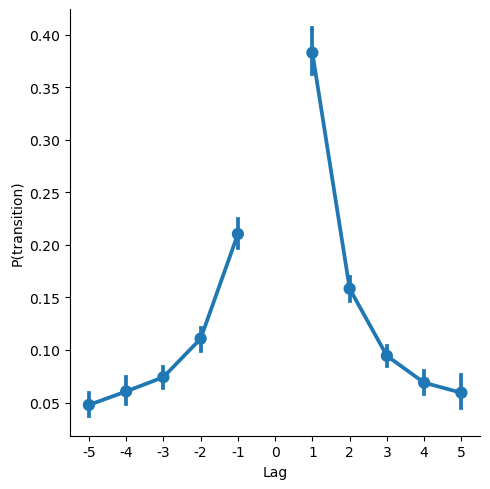

In [71]:
g = sns.catplot(x='lag', y='prob', kind='point', 
                  data=pb_min_crp.query('lag <= 5 and lag >= -5'))
g.set(xlabel='Lag', ylabel='P(transition)')

In [ ]:
importlib.reload(pb)
pb_temp_fact = events.groupby("subject").apply(pb.pd_min_temp_fact,
                                                   itemno_column='item_num', 
                                                   list_index=['subject', 'session', 'list'], 
                                                   pres_type="WORD", rec_type="REC_WORD", type_column='type',
                                               max_n_reps=3
                                                   ).to_frame(name='temp_fact').reset_index()

pb_temp_fact

[10 15 22] [ 7 20] 2 [-4 -3 -2 -1  1  2  3  4  5]
0.375
[ 4 16 26] [10 15 22] 1 [-2 -1  1  2  3]
0.5
[ 2  9 14] [ 4 16 26] 2 [-5 -4 -3 -2 -1  1  2]
0.0
[ 8 17 27] [ 2  9 14] 1 [-3 -2 -1  1  2  3  4]
0.5
[13 21 27] [10 17 25] 2 [-4 -3 -2 -1  1  2]
0.0
[16] [13 21 27] 3 [-7 -5 -2 -1  1  2  3]
0.0
[14] [16] 2 [-10  -8  -7  -5  -2  -1   2   4   6]
0.25
[ 7 15 19] [14] 1 [-8 -6 -5 -3 -2  1  4  8]
0.2857142857142857
[ 4 13 19] [1 3] 1 [ 1  2  3  4  5  6  7 11 14 15]
1.0
[14 16 21] [ 4 13 19] 1 [-2 -1  1  2  3]
0.5
[6] [14 16 21] 8 [-8 -7 -3 -2 -1  1  2]
None
[18 23 27] [6] 12 [-4 -1  1  2  3  4 11 12]
0.0
[ 8 15 21] [ 7 23 25] 1 [-5 -3 -1  1  2  4]
0.4
[10 12 26] [ 8 15 21] 2 [-6 -2 -1  1  2  3]
0.2
[ 6 16 19] [10 12 26] 4 [-8 -6 -4 -1  1  4  5  6]
0.2857142857142857
[ 1 22] [ 6 16 19] 3 [-4 -3 -1  1  3]
0.0
[23] [21] 2 [-17 -11  -7  -5  -3  -2  -1   1   2   3   4]
0.2
[24 27] [23] 1 [-19 -13  -9  -7  -4  -3  -1   1   2   3]
0.2222222222222222
[ 6 17 25] [24 27] 1 [-20 -14 -10  -8  -5  -4  -

/usr/global/miniconda/py310_23.1.0-1/envs/workshop_311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


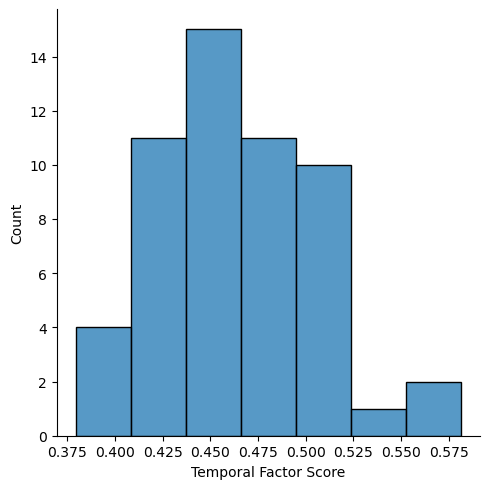

In [73]:
g = sns.displot(x='temp_fact', data=pb_temp_fact)
g.set(xlabel='Temporal Factor Score')